#Table generation
Pulsar version

In [3]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw967'))
from uw.like2 import (process,main,maps,); 
map( reload,         (process,main,maps,) );

In [4]:
self=r= process.Process('.', xtables_flag=True, residual_flag=False)

Using configuration file "config.txt" in folder: /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw967/.
Opening dataset P301_6years from key in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py
Extracting DSS from existing binfile
GTI from binfile Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
Verified binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits
no header info in ltcube?
Accepting ltcube without DSS info since legacy specified
Failed gti check:
  ltcube: Gti: 37884 intervals from 239557417 to 428689918, on time 150902856 
 binfile: Gti: 38437 intervals from 239557417 to 428689918, on time 150881091
loading binfile /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/P8_P301/6years_4bpd.fits ... found 162070183 photons in 40 bands, energies 10-1000000 MeV
dataset "P301_6years", found in /afs/slac/g/glast/groups/catalog//pointlike/fermi/data/dataspec.py:
  Bins per decade: 4
  FT1 files: 	Non

In [5]:
table_info={'ts':  (maps.ResidualTS, dict(photon_index=2.2)),
            'kde': (maps.KdeMap, dict()),
            'tsx': (maps.ResidualTS, dict(photon_index=2.3)),
            'tsp': (maps.ResidualTS, dict(model='ExpCutoff(1e-10,2.2, 2000.)'))
           }

In [9]:
r.setup_roi(888); 

230 total sources: 3 extended, 3 global


/afs/slac/g/glast/groups/catalog/python/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [13]:
def tables(self, special=False, mapkeys=['ts', 'kde']):
    tinfo = [maps.table_info[key] for key in mapkeys]
    skyfuns = [(entry[0], key, entry[1]) for key,entry in zip(mapkeys, tinfo)]  
    rt = maps.ROItables(self.outdir, nside=self.tables_nside, skyfuns=skyfuns )
    rt(self)
tables(self, mapkeys=['tsp'])

ResidualTS: using spectral model: ExpCutoff(1e-10,2.2, 2000.)
converting resid to PLSuperExpCutoff
filling table tsp   with 1849 entries...  min=   0.0, max=  36.4, mean=   3.0  --> ./tsp_table_512/HP12_0888.pickle


In [15]:
from uw.like2.pub import healpix_map
healpix_map.assemble_tables(['tsx'])

Table tsx Filled ok
appended column tsx

wrote FITS file to ./hptables_tsx_512.fits


/afs/slac/g/glast/groups/catalog/pointlike/python/uw/like2/pub/healpix_map.py:288: PyfitsDeprecationWarning: The new_table function is deprecated as of version 3.3 and may be removed in a future version.

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.
  table = pyfits.new_table(cols, header=pyfits.Header(cards))


In [20]:
r.summarize()

current likelihood, est. diff to peak: 1165438.8, 2.74
Name                  index     value  error(%)  gradient
P86Y4111_Norm             0 5.145e-13      24.1      -0.7
        _Index            1     2.697       8.5      -0.4
PSR J1747-2958_Norm       2 3.764e-11       6.4      27.8
              _Index      3     2.171       3.9       2.6
              _Cutoff     4      4650      19.9      11.3
P86Y4089_Norm             5 1.745e-12      22.4       1.2
        _Index            6     2.536      13.8      -0.2
        _beta             7    0.2502      96.2       2.1
P86Y4067_Norm             8 2.001e-11       2.8      23.0
        _Index            9     1.992       2.0       0.2
        _beta            10    0.2009      12.0      23.6
P86Y4088_Norm            11 1.142e-12      15.9       1.6
        _Index           12     2.742       4.4       3.3
P86Y4120_Norm            13 4.791e-13      31.4      -0.7
        _Index           14     2.787       9.6       1.8
S966-2102_Norm   

In [11]:
r.process()

2015-05-18 15:45:52 - HP12_0888 - interactive
generating index table for nside, subnside= 12 512
filling table tsx   with 1849 entries...  min=   0.0, max= 702.0, mean=   1.5  --> ./tsx_table_512/HP12_0888.pickle


In [41]:
from uw.like2 import maps; reload(maps)
self=r
rt = maps.ROItables(self.outdir, nside=self.tables_nside,
       skyfuns= ( 
        (maps.ResidualTS, 'tsp', dict(model='ExpCutoff(1e-10,2.2, 2000.)'),
          ),
          ),
       )

In [42]:
rt(self)

ResidualTS: using spectral model: ExpCutoff(1e-10,2.2, 2000.)
converting resid to PLSuperExpCutoff
filling table tsp   with 1849 entries...  min=   0.0, max=  36.4, mean=   3.0  --> ./tsp_table_512/HP12_0888.pickle


The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


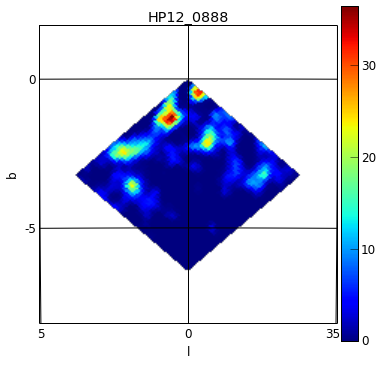

In [43]:
tsp = maps.DisplayTable('tsp', 888)
tsp.plot()

In [4]:
self=r
print r.del_source('PSR*')
from uw.like2 import maps; reload(maps)
self=r
rtx = maps.ROItables(self.outdir, nside=self.tables_nside,
       skyfuns= (
        (maps.ResidualTS, 'tsx', dict(model='ExpCutoff(1e-10,2.2, 2000.)'),
          ),
          ),
       )
rtx(self)

	name  : PSR J1747-2958
	skydir: SkyDir(266.812,-29.984)
	model : PLSuperExpCutoff
		Norm      : (1 + 0.067 - 0.062) (avg = 0.064) 3.76e-11   
		Index     : (1 + 0.039 - 0.039) (avg = 0.039) 2.17       
		Cutoff    : (1 + 0.220 - 0.180) (avg = 0.199) 4.65e+03   
		b         : (1 + 0.000 - 0.000) (avg = 0.000) 1          (FROZEN)
		Ph. Flux  : (1 + 0.113 - 0.101) (avg = 0.107) 4.78e-07   (DERIVED)
		En. Flux  : (1 + 0.065 - 0.061) (avg = 0.063) 2.36e-10   (DERIVED)
ResidualTS: using spectral model: ExpCutoff(1e-10,2.2, 2000.)
converting resid to PLSuperExpCutoff
filling table tsx   with 1849 entries...  min=   0.0, max=3647.5, mean=  83.9  --> ./tsx_table_512/HP12_0888.pickle


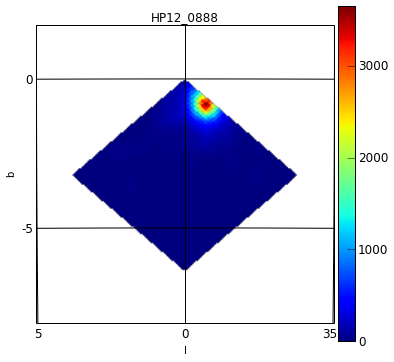

In [5]:
dt = maps.DisplayTable('tsx', 888)
dt.plot()

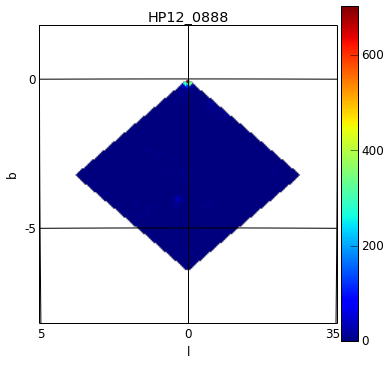

In [14]:
dt = maps.DisplayTable('tsx', 888)
dt.plot()

In [7]:
from uw.like2.analyze import hptables; reload(hptables)
hpt = hptables.HPtables()


loaded file hptables_ts10_ts50_512.fits 
Seedfile seeds.txt not found


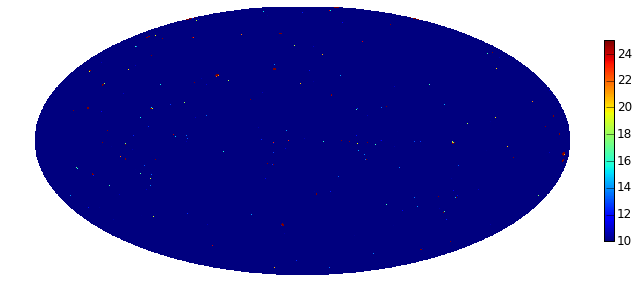

In [8]:
hpt.tsname='ts50'
hpt.ts_map();

In [12]:
from uw.like2.pub import healpix_map; reload(healpix_map)
hpts = healpix_map.HParray('ts50', hpt.tables['ts50']); hpts

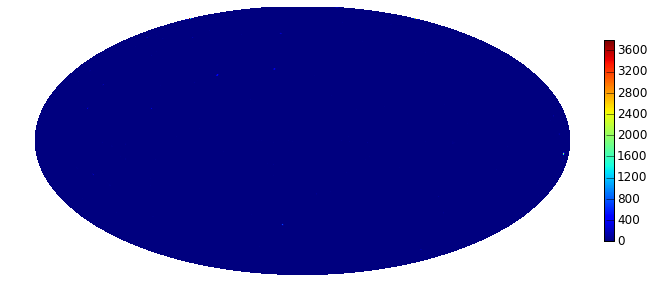

In [16]:
ait = hpts.plot(ait_kw=dict(pixelsize=0.10)); ait

In [21]:
from skymaps import SkyDir
self=ait
self.skyimage.reimage(SkyDir(0,0, SkyDir.GALACTIC), 'test.fits', self.pixelsize, self.size,self.proj, True)

In [22]:
!ls -l *.fits

-rw-rw-r-- 1 burnett glast-pipeline 25174080 Feb 25 09:13 hptables_ts10_ts50_512.fits
-rw-rw-r-- 1 burnett glast-pipeline 21064320 Feb 26 11:53 test.fits


In [ ]:
from uw.like2.pub import healpix_map
healpix_map.assemble_tables(['ts10', 'ts50'])


In [ ]:
hpt.tsname='ts10'
hpt.ts_map();

In [ ]:
!ls $FERMI/catalog/2FHL*

In [ ]:
import pyfits
filename = os.path.expandvars('$FERMI/catalog/2FHL_catalog_v0.fits')
pf = pyfits.open(filename)
subset=pf[1].columns[:11]
tbhdu = pyfits.BinTableHDU.from_columns(subset)
pps = pd.DataFrame(tbhdu.data)
pps.to_csv(filename.replace('fits','csv'), indexcol=0)

In [ ]:
fig, axx = plt.subplots(1,2, figsize=(10,5))
ax = axx[0]
ax.hist(pps.Spectral_Index.clip(0.8), np.linspace(0,8,17));
plt.setp(ax, xlabel='Spectral Index')
ax.grid()
ax=axx[1]
ax.scatter(pps.Spectral_Index.clip(0,8), pps.TS)
plt.setp(ax, xlim=(0,8.1), yscale='log', ylabel='TS', xlabel='Spectral index')
ax.grid()
ax.axhline(25);

In [ ]:
pps[pps.Spectral_Index>5][]